# Exploratory Analysis and Topic Modeling

https://stellacherotich.medium.com/discovering-topic-modeling-with-nmf-fe09c67d5f22

In [2]:
import pandas as pd
import re # Load the regular expression library (Data Preprocessing)

### Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/all_articles_with_source.csv")
df.head()

,article_url,title,content,text
0,https://newsrare.es/barometro/el-impacto-del-n...,El impacto del nuevo marco de evaluación de te...,FIGURA 1: DISTRIBUCIÓN POR PERFILES DE LOS ENC...,El impacto del nuevo marco de evaluación de te...
1,https://newsrare.es/barometro/la-organizacion-...,La organizacion de los recursos asistenciales ...,Consejo de redacción de newsRARE\n\nEl propósi...,La organizacion de los recursos asistenciales ...
2,https://newsrare.es/barometro/innovacion-terap...,Innovación terapéutica en el ámbito de las EERR,Consejo de redacción de newsRARE\n\nEl propósi...,Innovación terapéutica en el ámbito de las EER...
3,https://newsrare.es/barometro/pulso-de-la-situ...,Pulso de la situación,Consejo de redacción de newsRARE\n\n\nA partir...,Pulso de la situación Consejo de redacción de ...
4,https://newsrare.es/barometro/politicas-y-proc...,Políticas y proceso regulatorio en EERR,Consejo de redacción de newsRARE\n\nEl propósi...,Políticas y proceso regulatorio en EERR Consej...


In [5]:
# Nos vamos a quedar con solo los campos que vamos a utilizar para el topic modeling. El cual contiene el título y el texto del artículo
data= df[["title","text"]]
data.head() # Make sure ist a df

,title,text
0,El impacto del nuevo marco de evaluación de te...,El impacto del nuevo marco de evaluación de te...
1,La organizacion de los recursos asistenciales ...,La organizacion de los recursos asistenciales ...
2,Innovación terapéutica en el ámbito de las EERR,Innovación terapéutica en el ámbito de las EER...
3,Pulso de la situación,Pulso de la situación Consejo de redacción de ...
4,Políticas y proceso regulatorio en EERR,Políticas y proceso regulatorio en EERR Consej...


In [6]:
import re
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

# Descargar recursos necesarios
nltk.download('stopwords')
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

def clean_text(text):
    """Limpieza básica del texto."""
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", text)
    return text.strip().lower()

def lemmatize_text(text):
    """Lematización del texto usando spaCy."""
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ not in stop_words and not token.is_punct])

def preprocess_column(df, col_name):
    """Aplica limpieza y lematización a una columna de texto."""
    df[col_name] = df[col_name].astype(str).apply(clean_text)
    df[f"processed_{col_name}"] = df[col_name].apply(lemmatize_text)
    return df

def generate_wordcloud(text, title=""):
    """Genera e imprime una nube de palabras a partir de texto."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

def get_term_frequencies(text_series, top_n=20):
    """Devuelve las palabras más frecuentes de una serie de texto."""
    all_words = " ".join(text_series).split()
    return Counter(all_words).most_common(top_n)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 125.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


WordCloud & Term-Freq

/tmp/ipython-input-6-4015446033.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].astype(str).apply(clean_text)
/tmp/ipython-input-6-4015446033.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"processed_{col_name}"] = df[col_name].apply(lemmatize_text)


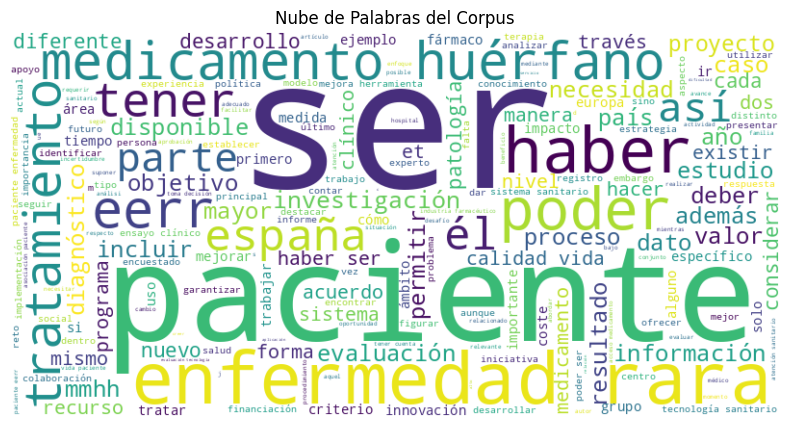


Top 20 Palabras Más Frecuentes:
ser: 3347
paciente: 2252
enfermedad: 2032
haber: 1537
medicamento: 1469
poder: 1082
eerr: 1008
rara: 1002
tratamiento: 962
sanitario: 811
tener: 810
acceso: 690
clínico: 665
salud: 635
evaluación: 627
investigación: 627
sistema: 585
nuevo: 579
él: 504
atención: 503


In [7]:
# Preprocesar la columna de texto 'text'
data = preprocess_column(data, 'text')

# Concatenar todo el texto procesado para la nube de palabras
full_text = " ".join(data['processed_text'].dropna())

# Generar la nube de palabras
generate_wordcloud(full_text, title="Nube de Palabras del Corpus")

# Obtener y mostrar las frecuencias de los términos
term_frequencies = get_term_frequencies(data['processed_text'].dropna())

print("\nTop 20 Palabras Más Frecuentes:")
for word, freq in term_frequencies:
    print(f"{word}: {freq}")

In [ ]:
# Aplicamos limpieza y lematización a cada columna
# Nos vamos a quedar con solo los campos que vamos a utilizar para el topic modeling. El cual contiene el título y el texto del artículo
df=pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/all_articles_with_source.csv")
data= df[["title","content","text"]]
data = preprocess_column(data, "title")
data = preprocess_column(data, "content")
data = preprocess_column(data, "text")

# Guardar el DataFrame preprocesado
data.to_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/all_articles_procesados.csv", index=False, encoding="utf-8")

# Revisar los resultados del preprocesamiento
print(data[["title", "processed_title", "content", "processed_content", "text", "processed_text"]].head())

<ipython-input-6-976b1b53db92>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name] = df[col_name].astype(str).apply(clean_text)


                                               title  \
0  el impacto del nuevo marco de evaluación de te...   
1  la organizacion de los recursos asistenciales ...   
2    innovación terapéutica en el ámbito de las eerr   
3                              pulso de la situación   
4            políticas y proceso regulatorio en eerr   

                                     processed_title  \
0  impacto nuevo marco evaluación tecnología sani...   
1  organizacion recurso asistencial atencion pers...   
2                 innovación terapéutico ámbito eerr   
3                                    pulso situación   
4                  política proceso regulatorio eerr   

                                             content  \
0  figura  distribución por perfiles de los encue...   
1  consejo de redacción de newsrare el propósito ...   
2  consejo de redacción de newsrare el propósito ...   
3  consejo de redacción de newsrare a partir de a...   
4  consejo de redacción de newsrare el propósi

# TF-IDF y NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def apply_nmf(data, column,size_ngram=1, num_topics=10, n_top_words=6, stop_words=None):
    """
    Aplica NMF a una columna de texto del DataFrame.

    Parámetros:
    - data: DataFrame con los textos.
    - column: nombre de la columna a utilizar.
    - size_ngram : tamaño del n-grama (1->palabra, 2-> bigrama, 3->trigrama)
    - num_topics: número de tópicos a extraer.
    - n_top_words: número de palabras clave por tópico.
    - stop_words: lista de stopwords personalizada.

    Devuelve:
    - DataFrame actualizado con columnas de tópicos asignados.
    - Diccionario con palabras clave por tópico.
    - Modelo NMF entrenado.
    - Matriz TF-IDF.
    """
    vectorizer = TfidfVectorizer(ngram_range=(size_ngram, size_ngram), max_df=0.3, min_df=2, stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(data[column])

    nmf_model = NMF(n_components=num_topics, random_state=42, max_iter=500)
    nmf_model.fit(tfidf_matrix)

    feature_names = vectorizer.get_feature_names_out()
    topic_words = {}
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        topic_words[topic_idx] = [feature_names[i] for i in top_words_indices]

    assigned_topics = nmf_model.transform(tfidf_matrix).argmax(axis=1)
    data[f'assigned_{column}_topic'] = assigned_topics
    data[f'topic_{column}_words'] = data[f'assigned_{column}_topic'].apply(
        lambda topic_idx: ", ".join(topic_words[topic_idx])
    )

    return data, topic_words, nmf_model, tfidf_matrix

In [ ]:
# Parámetros de configuración
num_topics_list = [5,7,10,12,15]  # Número de tópicos
ngram_sizes = [1, 2, 3]  # Tamaños de n-grama
columns_to_model = ["processed_title", "processed_content", "processed_text"]  # Columnas a modelar

# Diccionarios para almacenar modelos y resultados
nmf_models = {}
tfidf_matrices = {}
topic_words_dicts = {}

# Aplicar NMF a cada columna con diferentes configuraciones
for column in columns_to_model:
    for ngram_size in ngram_sizes:
        for num_topics in num_topics_list:
            model_key = f"{column}_ngram_{ngram_size}_topics_{num_topics}"
            print(f"Entrenando modelo {model_key}...")

            processed_data, topic_words, nmf_model, tfidf_matrix = apply_nmf(
                data, column, size_ngram=ngram_size, num_topics=num_topics, n_top_words=6, stop_words=list(stop_words))

            # Almacenar resultados
            nmf_models[model_key] = nmf_model
            tfidf_matrices[model_key] = tfidf_matrix
            topic_words_dicts[model_key] = topic_words

Entrenando modelo processed_title_ngram_1_topics_5...
Entrenando modelo processed_title_ngram_1_topics_7...
Entrenando modelo processed_title_ngram_1_topics_10...
Entrenando modelo processed_title_ngram_1_topics_12...
Entrenando modelo processed_title_ngram_1_topics_15...
Entrenando modelo processed_title_ngram_2_topics_5...
Entrenando modelo processed_title_ngram_2_topics_7...
Entrenando modelo processed_title_ngram_2_topics_10...
Entrenando modelo processed_title_ngram_2_topics_12...
Entrenando modelo processed_title_ngram_2_topics_15...
Entrenando modelo processed_title_ngram_3_topics_5...
Entrenando modelo processed_title_ngram_3_topics_7...
Entrenando modelo processed_title_ngram_3_topics_10...
Entrenando modelo processed_title_ngram_3_topics_12...
Entrenando modelo processed_title_ngram_3_topics_15...
Entrenando modelo processed_content_ngram_1_topics_5...
Entrenando modelo processed_content_ngram_1_topics_7...
Entrenando modelo processed_content_ngram_1_topics_10...
Entrenando m

In [ ]:
import json
import pickle

# Guardar diccionario de palabras clave por tópico
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/topic_words_dicts.json", "w", encoding="utf-8") as f:
    json.dump(topic_words_dicts, f, ensure_ascii=False, indent=4)

# Guardar modelos NMF entrenados
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/nmf_models.pkl", "wb") as f:
    pickle.dump(nmf_models, f)

# Guardar matrices TF-IDF
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/tfidf_matrices.pkl", "wb") as f:
    pickle.dump(tfidf_matrices, f)

print("Todos los modelos y diccionarios han sido guardados correctamente.")

Todos los modelos y diccionarios han sido guardados correctamente.


# t-SNE y visualización con Plotly

In [ ]:
# t-SNE y visualización con Plotly
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import pandas as pd

def apply_tsne(tfidf_matrix, perplexity=30, n_iter=1000, random_state=42):
    """
    Aplica t-SNE a una matriz TF-IDF o documento-tema (como la W de NMF).

    Parámetros:
    - tfidf_matrix: matriz de características (e.g., salida de NMF.transform()).
    - perplexity: parámetro de t-SNE para control de densidad local.
    - n_iter: número de iteraciones.

    Devuelve:
    - Coordenadas 2D reducidas como un array NumPy.
    """
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
    tsne_coords = tsne.fit_transform(tfidf_matrix)
    return tsne_coords

def plot_tsne_with_topics(tsne_coords, topics, hover_text=None, title="Distribución de artículos por temas"):
    """
    Visualiza los resultados de t-SNE en 2D con colores por tópico asignado.

    Parámetros:
    - tsne_coords: matriz de coordenadas 2D reducidas.
    - topics: lista de tópicos asignados a cada punto.
    - hover_text: lista opcional de textos a mostrar al pasar el ratón.
    """
    df_vis = pd.DataFrame({
        "x": tsne_coords[:, 0],
        "y": tsne_coords[:, 1],
        "topic": topics,
        "text": hover_text if hover_text is not None else [f"Doc {i}" for i in range(len(topics))]
    })

    fig = go.Figure()

    for topic in sorted(df_vis["topic"].unique()):
        topic_data = df_vis[df_vis["topic"] == topic]
        fig.add_trace(go.Scatter(
            x=topic_data["x"],
            y=topic_data["y"],
            mode='markers',
            name=f"Tópico {topic}",
            text=topic_data["text"],
            hoverinfo='text',
            marker=dict(size=8, opacity=0.7)
        ))

    fig.update_layout(
        title=title,
        xaxis_title="t-SNE Dim 1",
        yaxis_title="t-SNE Dim 2",
        template="plotly_white",
        showlegend=True
    )


# Evaluación cuantitativa

In [ ]:
import json
import pickle
# Cargar diccionario de palabras clave por tópico
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/topic_words_dicts.json", "r", encoding="utf-8") as f:
    topic_words_dicts = json.load(f)

# Cargar modelos NMF entrenados
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/nmf_models.pkl", "rb") as f:
    nmf_models = pickle.load(f)

# Cargar matrices TF-IDF
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/tfidf_matrices.pkl", "rb") as f:
    tfidf_matrices = pickle.load(f)

print("Todos los modelos y diccionarios han sido cargados correctamente.")

data= pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/all_articles_procesados.csv")

Todos los modelos y diccionarios han sido cargados correctamente.


## Calcular coherencia de tópicos (C_v)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

def extract_ngrams(texts, n):
    """
    Tokeniza los textos en n-gramas usando sklearn.
    """
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(texts)
    ngram_tokens = [list(vectorizer.build_analyzer()(doc)) for doc in texts]
    return ngram_tokens

def evaluate_all_models_nmf(nmf_models, topic_words_dicts, data):
    """
    Evalúa todos los modelos NMF calculando coherencia C_v y C_umass,
    respetando el tamaño de n-grama utilizado en cada modelo.

    Parámetros:
    - nmf_models: diccionario con modelos NMF entrenados.
    - topic_words_dicts: diccionario con listas de palabras clave por tópico.
    - data: DataFrame con textos preprocesados.

    Devuelve:
    - DataFrame con los resultados de evaluación de coherencia.
    """
    evaluation_results = {}

    for model_key in nmf_models.keys():
        print(f"\n Evaluando modelo {model_key}...")

        # Detectar ngram_size y columna a partir de la clave
        try:
            ngram_size = int(model_key.split("_ngram_")[1].split("_")[0])
            column_name = model_key.split("_ngram_")[0]
        except Exception as e:
            print(f" No se pudo interpretar la clave del modelo: {model_key}")
            continue

        # Tokenizar los textos según el n-grama
        texts = data[column_name].astype(str).fillna("").tolist()
        processed_texts = extract_ngrams(texts, n=ngram_size)

        # Crear diccionario de Gensim
        dictionary = Dictionary(processed_texts)

        # Obtener tópicos (listas de palabras o n-gramas)
        topics_raw = topic_words_dicts.get(model_key, {}).values()

        # Validar formato
        topics = []
        for topic in topics_raw:
            if isinstance(topic, list) and all(isinstance(word, str) for word in topic):
                topics.append(topic)

        if not topics or all(len(t) == 0 for t in topics):
            print(f" Saltando {model_key}: tópicos inválidos o vacíos.")
            continue

        try:
            # Coherencia C_v
            coherence_model_cv = CoherenceModel(
                topics=topics, texts=processed_texts, dictionary=dictionary, coherence='c_v'
            )
            coherence_cv = coherence_model_cv.get_coherence()

            # Coherencia UMass
            coherence_model_umass = CoherenceModel(
                topics=topics, texts=processed_texts, dictionary=dictionary, coherence='u_mass'
            )
            coherence_umass = coherence_model_umass.get_coherence()

            evaluation_results[model_key] = {
                "coherence_C_v": round(coherence_cv, 4),
                "coherence_C_umass": round(coherence_umass, 4)
            }

            print(f"C_v: {coherence_cv:.4f} | C_umass: {coherence_umass:.4f}")

        except Exception as e:
            print(f"Error evaluando {model_key}: {e}")

    return evaluation_results


In [ ]:
# Ejecutar evaluación en todos los modelos cargados
results = evaluate_all_models_nmf(nmf_models, topic_words_dicts, data)

# Mostrar resultados en tabla
import pandas as pd
df_results = pd.DataFrame.from_dict(results, orient="index")
print("\nResultados finales:")
print(df_results)


🔍 Evaluando modelo processed_title_ngram_1_topics_5...
C_v: 0.7279 | C_umass: -3.9572

🔍 Evaluando modelo processed_title_ngram_1_topics_7...
C_v: 0.6873 | C_umass: -5.4708

🔍 Evaluando modelo processed_title_ngram_1_topics_10...
C_v: 0.6861 | C_umass: -5.5830

🔍 Evaluando modelo processed_title_ngram_1_topics_12...
C_v: 0.6573 | C_umass: -6.2383

🔍 Evaluando modelo processed_title_ngram_1_topics_15...
C_v: 0.6468 | C_umass: -7.4074

🔍 Evaluando modelo processed_title_ngram_2_topics_5...
C_v: 0.5782 | C_umass: -10.6833

🔍 Evaluando modelo processed_title_ngram_2_topics_7...
C_v: 0.5972 | C_umass: -9.8643

🔍 Evaluando modelo processed_title_ngram_2_topics_10...
C_v: 0.6118 | C_umass: -9.0449

🔍 Evaluando modelo processed_title_ngram_2_topics_12...
C_v: 0.5998 | C_umass: -9.1772

🔍 Evaluando modelo processed_title_ngram_2_topics_15...
C_v: 0.5523 | C_umass: -9.5761

🔍 Evaluando modelo processed_title_ngram_3_topics_5...
C_v: 0.5040 | C_umass: -11.3538

🔍 Evaluando modelo processed_title

In [ ]:
df_results.to_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv", index=True, encoding="utf-8")

In [ ]:
df_results=pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv")
df_results

,Unnamed: 0,coherence_C_v,coherence_C_umass
0,processed_title_ngram_1_topics_5,0.7279,-3.9572
1,processed_title_ngram_1_topics_7,0.6873,-5.4708
2,processed_title_ngram_1_topics_10,0.6861,-5.5830
3,processed_title_ngram_1_topics_12,0.6573,-6.2383
4,processed_title_ngram_1_topics_15,0.6468,-7.4074
5,processed_title_ngram_2_topics_5,0.5782,-10.6833
6,processed_title_ngram_2_topics_7,0.5972,-9.8643
7,processed_title_ngram_2_topics_10,0.6118,-9.0449
8,processed_title_ngram_2_topics_12,0.5998,-9.1772
9,processed_title_ngram_2_topics_15,0.5523,-9.5761


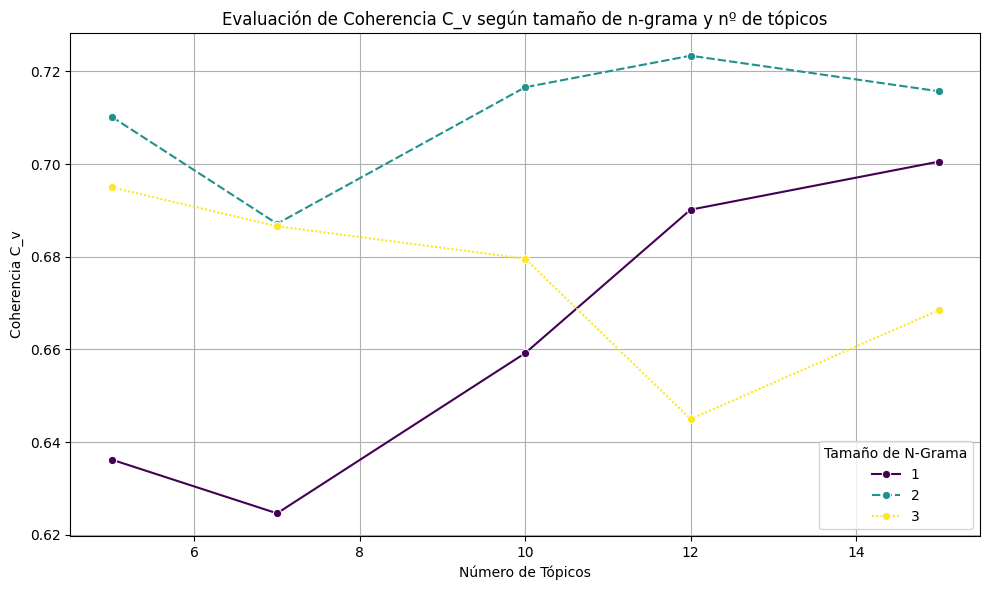

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar el CSV con los resultados
df = pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv")

# Extraer el tamaño del n-grama y el número de tópicos
df["ngram_size"] = df["Unnamed: 0"].str.extract(r'ngram_(\d+)').astype(float)
df["num_topics"] = df["Unnamed: 0"].str.extract(r'topics_(\d+)').astype(float)


# Eliminar cualquier fila con NaNs en columnas clave
df = df.dropna(subset=["coherence_C_v", "ngram_size", "num_topics"])

# Convertir a int para ejes
df["ngram_size"] = df["ngram_size"].astype(int)
df["num_topics"] = df["num_topics"].astype(int)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="num_topics",
    y="coherence_C_v",
    hue="ngram_size",
    marker="o",
    palette="viridis",
    style="ngram_size",
    errorbar=None
)

# Etiquetas y estética
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia C_v")
plt.title("Evaluación de Coherencia C_v según tamaño de n-grama y nº de tópicos")
plt.legend(title="Tamaño de N-Grama")
plt.grid(True)
plt.tight_layout()
plt.show()


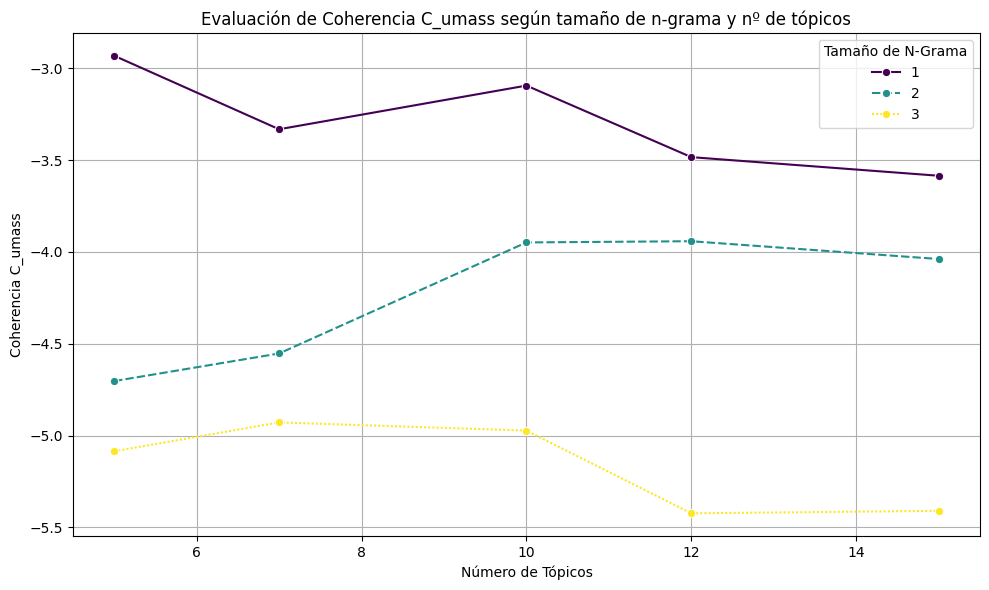

In [ ]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="num_topics",
    y="coherence_C_umass",
    hue="ngram_size",
    marker="o",
    palette="viridis",
    style="ngram_size",
    errorbar=None
)

# Etiquetas y estética
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia C_umass")
plt.title("Evaluación de Coherencia C_umass según tamaño de n-grama y nº de tópicos")
plt.legend(title="Tamaño de N-Grama")
plt.grid(True)
plt.tight_layout()
plt.show()


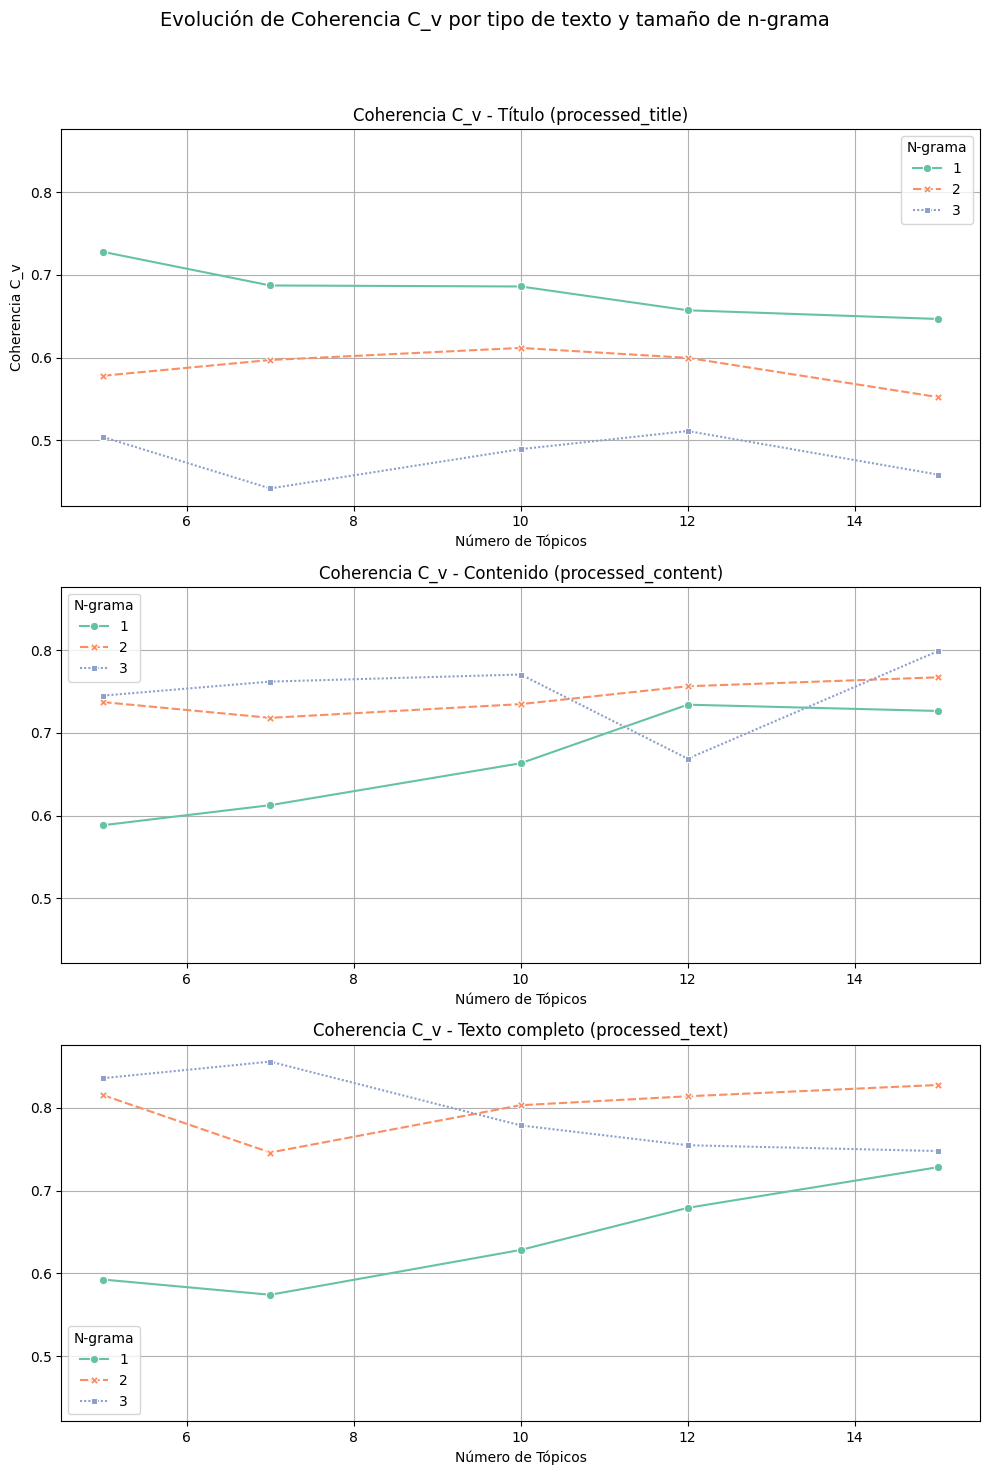

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los resultados
df = pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv")

# Extraer columnas necesarias
df["columna"] = df["Unnamed: 0"].str.extract(r"^(.*?)_ngram")[0]
df["ngram_size"] = df["Unnamed: 0"].str.extract(r'ngram_(\d+)')[0].astype(float)
df["num_topics"] = df["Unnamed: 0"].str.extract(r'topics_(\d+)')[0].astype(float)

# Eliminar nulos y convertir tipos
df = df.dropna(subset=["coherence_C_v", "ngram_size", "num_topics"])
df["ngram_size"] = df["ngram_size"].astype(int)
df["num_topics"] = df["num_topics"].astype(int)

# Definir columnas a graficar
columnas = ["processed_title", "processed_content", "processed_text"]
titulos = {
    "processed_title": "Título (processed_title)",
    "processed_content": "Contenido (processed_content)",
    "processed_text": "Texto completo (processed_text)"
}

# Crear subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharey=True)

for i, col in enumerate(columnas):
    sub_df = df[df["columna"] == col]

    sns.lineplot(
        data=sub_df,
        x="num_topics",
        y="coherence_C_v",
        hue="ngram_size",
        style="ngram_size",
        markers=True,
        ax=axes[i],
        palette="Set2",
        errorbar=None
    )

    axes[i].set_title(f"Coherencia C_v - {titulos[col]}")
    axes[i].set_xlabel("Número de Tópicos")
    axes[i].set_ylabel("Coherencia C_v" if i == 0 else "")
    axes[i].legend(title="N-grama")
    axes[i].grid(True)

plt.suptitle("Evolución de Coherencia C_v por tipo de texto y tamaño de n-grama", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


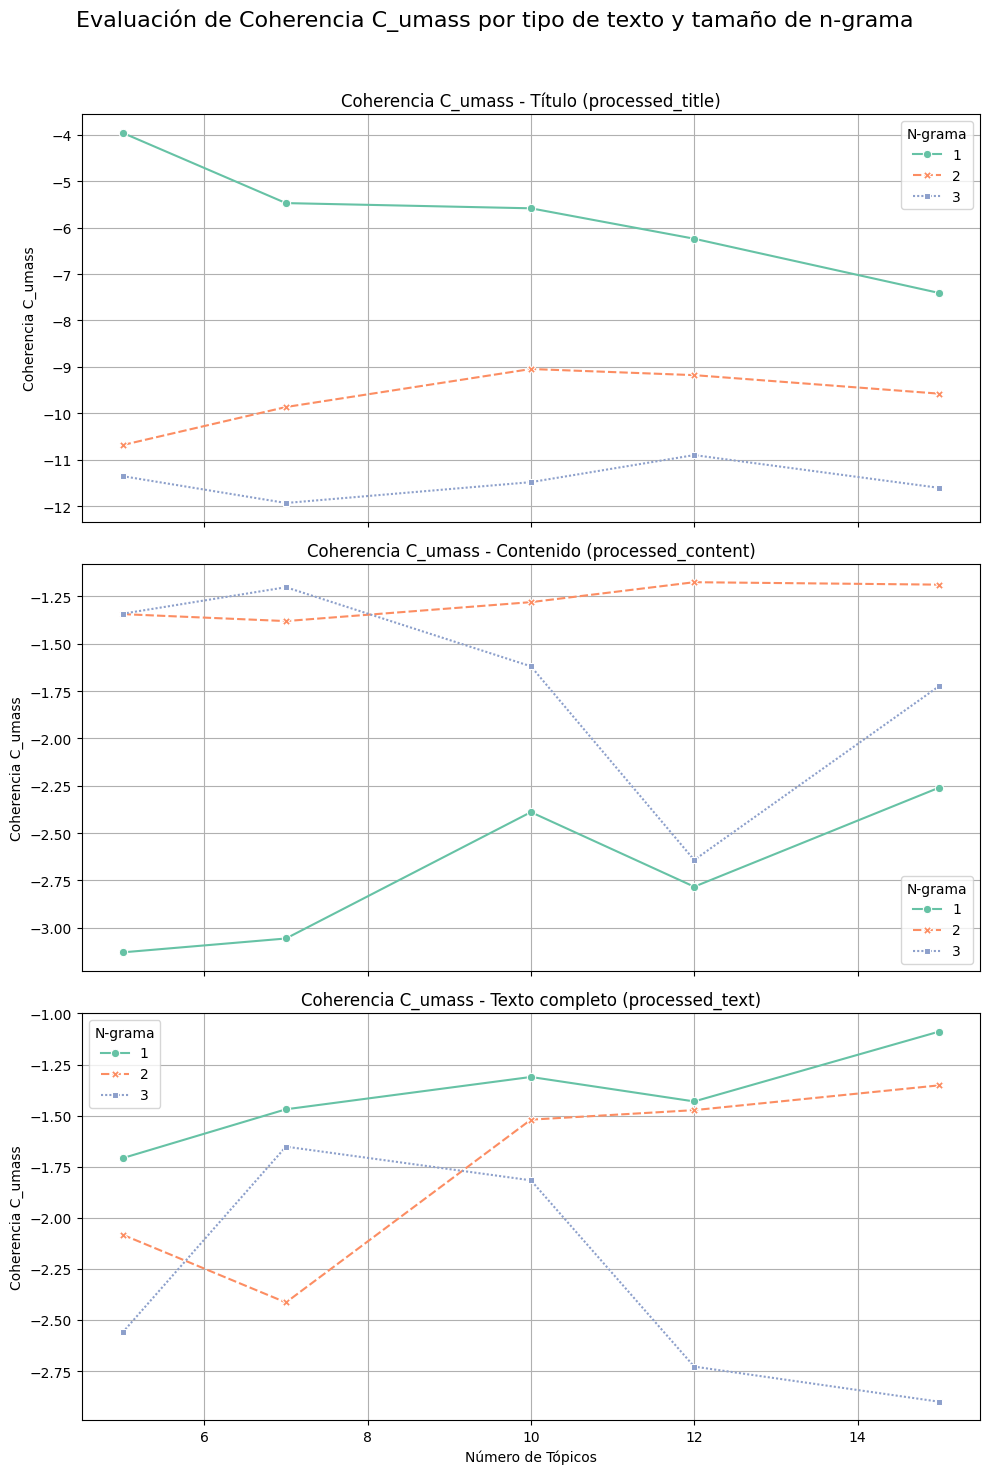

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los resultados
df = pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv")

# Extraer campos necesarios
df["columna"] = df["Unnamed: 0"].str.extract(r"^(.*?)_ngram")[0]
df["ngram_size"] = df["Unnamed: 0"].str.extract(r'ngram_(\d+)')[0].astype(float)
df["num_topics"] = df["Unnamed: 0"].str.extract(r'topics_(\d+)')[0].astype(float)

# Eliminar nulos y convertir tipos
df = df.dropna(subset=["coherence_C_umass", "ngram_size", "num_topics"])
df["ngram_size"] = df["ngram_size"].astype(int)
df["num_topics"] = df["num_topics"].astype(int)

# Definir columnas
columnas = ["processed_title", "processed_content", "processed_text"]
titulos = {
    "processed_title": "Título (processed_title)",
    "processed_content": "Contenido (processed_content)",
    "processed_text": "Texto completo (processed_text)"
}

# Crear subplots verticales
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for i, col in enumerate(columnas):
    sub_df = df[df["columna"] == col]

    sns.lineplot(
        data=sub_df,
        x="num_topics",
        y="coherence_C_umass",
        hue="ngram_size",
        style="ngram_size",
        markers=True,
        ax=axes[i],
        palette="Set2",
        errorbar=None
    )

    axes[i].set_title(f"Coherencia C_umass - {titulos[col]}")
    axes[i].set_ylabel("Coherencia C_umass")
    axes[i].grid(True)
    axes[i].legend(title="N-grama")

axes[-1].set_xlabel("Número de Tópicos")
plt.suptitle("Evaluación de Coherencia C_umass por tipo de texto y tamaño de n-grama", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


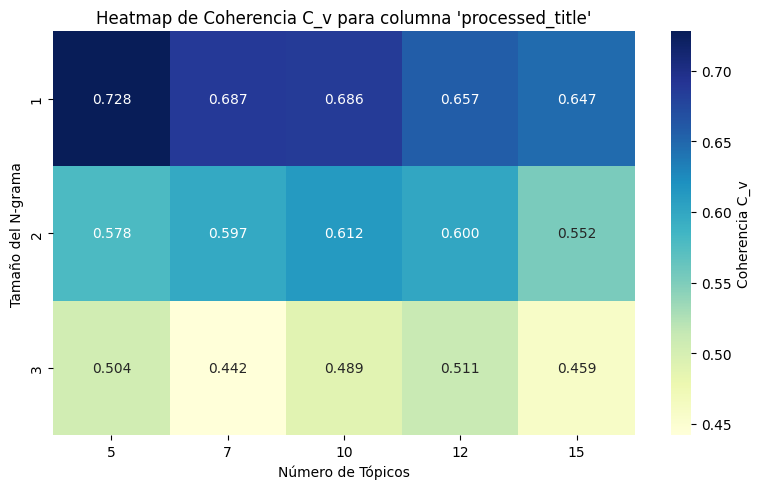

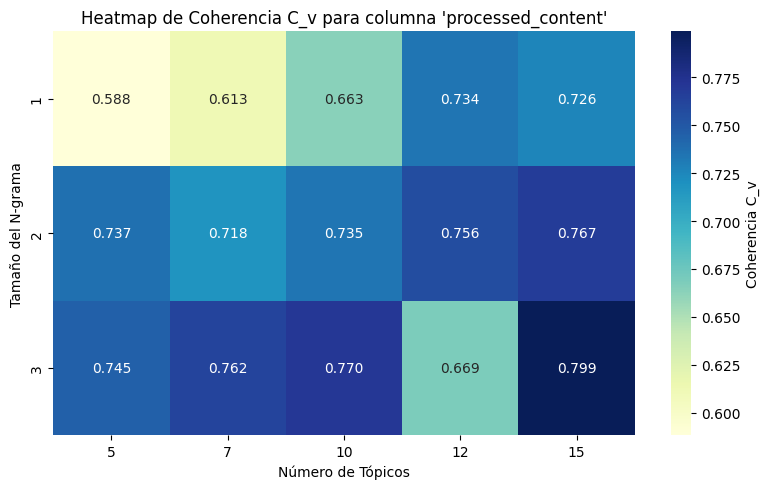

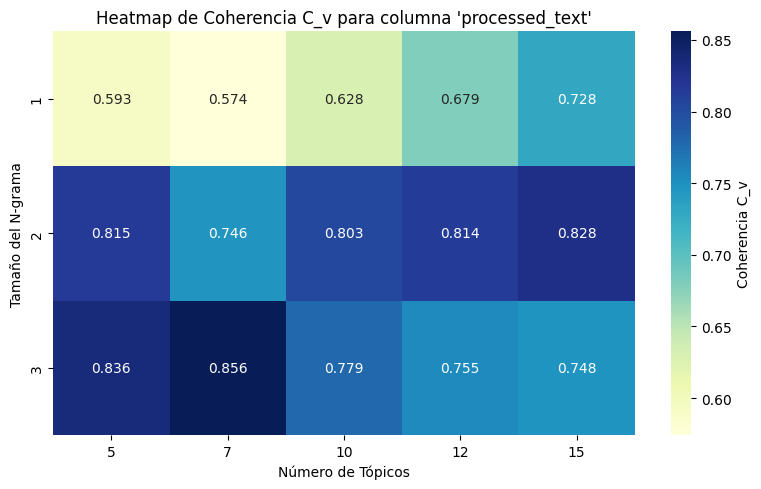

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los resultados
df = pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/coherence_evaluation.csv")

# Extraer componentes desde la columna del índice
df["columna"] = df["Unnamed: 0"].str.extract(r'^(.*?)_ngram')[0]
df["ngram"] = df["Unnamed: 0"].str.extract(r'ngram_(\d+)').astype(int)
df["topics"] = df["Unnamed: 0"].str.extract(r'topics_(\d+)').astype(int)

# Crear tabla pivote: índice = ngram, columnas = topics, valores = C_v, separado por columna
for col in df["columna"].unique():
    pivot = df[df["columna"] == col].pivot(index="ngram", columns="topics", values="coherence_C_v")

    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={"label": "Coherencia C_v"})

    plt.title(f"Heatmap de Coherencia C_v para columna '{col}'")
    plt.xlabel("Número de Tópicos")
    plt.ylabel("Tamaño del N-grama")
    plt.tight_layout()
    plt.show()

# Evaluación cualitativa (análisis humano)

In [ ]:
import json
import pickle
import pandas as pd
# Cargar diccionario de palabras clave por tópico
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/topic_words_dicts.json", "r", encoding="utf-8") as f:
    topic_words_dicts = json.load(f)

# Cargar modelos NMF entrenados
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/nmf_models.pkl", "rb") as f:
    nmf_models = pickle.load(f)

# Cargar matrices TF-IDF
with open("/content/drive/MyDrive/AN_NO_STRUCT/TFM/evaluación_TM/tfidf_matrices.pkl", "rb") as f:
    tfidf_matrices = pickle.load(f)

print("Todos los modelos y diccionarios han sido cargados correctamente.")

data= pd.read_csv("/content/drive/MyDrive/AN_NO_STRUCT/TFM/all_articles_procesados.csv")

Todos los modelos y diccionarios han sido cargados correctamente.


In [ ]:
modelo_clave = "processed_text_ngram_2_topics_15"

# Mostrar palabras clave por tópico
topic_words = topic_words_dicts[modelo_clave]

print(f"Tópicos del modelo: {modelo_clave}")
for topic_id, keywords in topic_words.items():
    print(f"\nTópico {topic_id}:")
    print(", ".join(keywords))

Tópicos del modelo: processed_text_ngram_2_topics_15

Tópico 0:
acceso medicamento, jazz pharmaceuticals, ensayo clínico, ser importante, acceso paciente, punto vista

Tópico 1:
aprobado cipmps, financiación aprobado, huérfano financiación, cipmps enero, enero marzo, cipmps septiembre

Tópico 2:
indicación aprobada, huérfano indicación, aprobada ema, ema enero, ema septiembre, enero marzo

Tópico 3:
interministerial precio, comisión interministerial, medicamento cipm, aprobado comisión, precio medicamento, huérfano financiación

Tópico 4:
aprobado agencia, huérfano aprobado, medicamento ema, agencia europeo, europeo medicamento, junio septiembre

Tópico 5:
persona enfermedad, vivir enfermedad, enfermedad raro, paciente enfermedad, persona vivir, español enfermedad

Tópico 6:
paciente adulto, tratamiento paciente, paroxístico nocturno, hemoglobinuria paroxístico, nocturno hpn, tratamiento adulto

Tópico 7:
industria farmacéutico, académico consultor, miembro industria, clínico enfermerí

In [ ]:
from sklearn.preprocessing import normalize
import numpy as np

# Obtener modelo y matriz
nmf_model = nmf_models[modelo_clave]
tfidf_matrix = tfidf_matrices[modelo_clave]

# Obtener distribución de tópicos por documento
topic_distribution = normalize(nmf_model.transform(tfidf_matrix), norm='l1', axis=1)

# Asignar a cada documento su tópico dominante
dominant_topics = topic_distribution.argmax(axis=1)

# Añadir al DataFrame original
data["dominant_topic"] = dominant_topics

# Mostrar ejemplos de documentos por tópico
for topic_id in range(nmf_model.n_components):
    print(f"\n Ejemplo para Tópico {topic_id} - Palabras clave: {', '.join(topic_words[str(topic_id)])}")
    example = data[data["dominant_topic"] == topic_id].iloc[0]
    print(f" Título: {example['title']}")
    print(f" Texto: {example['processed_text'][:400]}...")


 Ejemplo para Tópico 0 - Palabras clave: ser importante, ensayo clínico, jazz pharmaceuticals, acceso medicamento, cuál ser, ser fundamental
 Título: pablo méndez valera  csl behring y el futuro de la terapia génica en hemofilia b innovación y acceso
 Texto: pablo méndez valerar   csl behring futuro terapia génico hemofilia b innovación acceso pablo méndez valerar head of market access   public affairs csl behring iberio poder comenzar explicándono ser hemofilio b cómo afectar padecer pm hemofilia b hb ser trastorno genético coagulación sangre causado deficiencia factor ix proteína esencial coagulación sanguíneo ser enfermedad raro hereditario ligado ...

 Ejemplo para Tópico 1 - Palabras clave: aprobado cipmps, huérfano financiación, financiación aprobado, cipmps enero, enero marzo, cipmps septiembre
 Título: medicamentos huérfanos con financiación aprobada por la cipmps desde enero hasta marzo
 Texto: medicamento huérfano financiación aprobado cipmps enero marzo   pills tablets and 

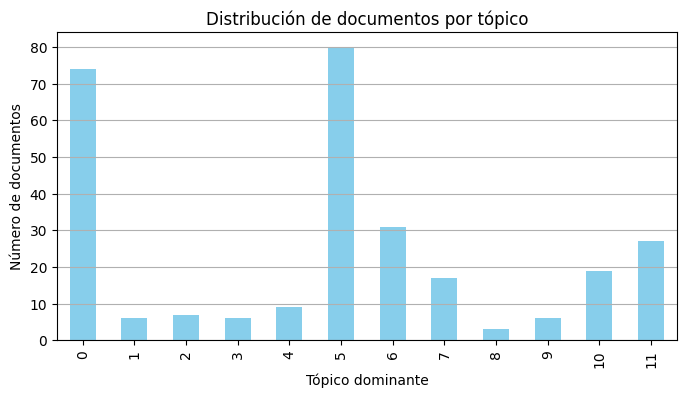

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
data["dominant_topic"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.xlabel("Tópico dominante")
plt.ylabel("Número de documentos")
plt.title("Distribución de documentos por tópico")
plt.grid(axis="y")
plt.show()

# Evaluación visual

In [ ]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# --- Modelos y configuración ---
modelos = {
    "Unigram": "processed_text_ngram_1_topics_15",
    "Bigram": "processed_text_ngram_2_topics_15",
    "Trigram": "processed_text_ngram_3_topics_15"
}

fig_display = go.Figure()
trace_offset = 0
buttons = []
visible_traces = []

for nombre, clave in modelos.items():
    nmf_model = nmf_models[clave]
    tfidf_matrix = tfidf_matrices[clave]
    topic_words = topic_words_dicts[clave]

    topic_distributions = nmf_model.transform(tfidf_matrix)
    dominant_topics = topic_distributions.argmax(axis=1)
    tsne_coords = TSNE(n_components=2, perplexity=30, random_state=42, init="pca").fit_transform(normalize(topic_distributions))

    # --- Paso 3: Etiquetas y DataFrame ---
    topic_labels = {int(k): f"Tópico {int(k)}: " + ", ".join(v[:2]) for k, v in topic_words.items()}
    df = pd.DataFrame({
        "x": tsne_coords[:, 0],
        "y": tsne_coords[:, 1],
        "Dominant Topic": dominant_topics,
        "Label": [topic_labels[t] for t in dominant_topics],
        "Article Title": data["title"].fillna("").values[:len(dominant_topics)]
    })

    current_traces = []
    for label in sorted(df["Label"].unique()):
        sub = df[df["Label"] == label]
        trace = go.Scattergl(
            x=sub["x"],
            y=sub["y"],
            mode="markers",
            name=f"{nombre} - {label}",
            text=sub["Article Title"] + "<br>" + sub["Label"],
            hoverinfo="text",
            marker=dict(size=6, opacity=0.7),
            visible=False  # todas ocultas inicialmente
        )
        fig_display.add_trace(trace)
        current_traces.append(trace_offset)
        trace_offset += 1
    visible_traces.append(current_traces)

# --- Configurar visibilidad para cada botón ---
for i, (nombre, _) in enumerate(modelos.items()):
    visible_array = [False] * len(fig_display.data)
    for idx in visible_traces[i]:
        visible_array[idx] = True

    buttons.append(dict(
        label=nombre,
        method="update",
        args=[{"visible": visible_array},
              {"title": f"Distribución de Tópicos ({nombre})",
               "xaxis.title": "t-SNE Dim 1",
               "yaxis.title": "t-SNE Dim 2"}]
    ))

# --- Mostrar unigram por defecto ---
for idx in visible_traces[0]:  # índice 0 = Unigram
    fig_display.data[idx].visible = True

# --- Layout final con selector en la derecha ---
fig_display.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.05,
        "y": 1.2,
    }],
    title="Distribución de Tópicos (Unigram)",
    xaxis_title="t-SNE Dim 1",
    yaxis_title="t-SNE Dim 2",
    margin=dict(l=20, r=20, t=40, b=20)
)

fig_display.show()
fig_display.write_html("topic_modeling.html")
